**EDA | Assignment  Question and Answer**

In [31]:
#Q1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows. (Show the shape and column names as well.)

#Answer:

import pandas as pd

df = pd.read_csv("BIKE DETAILS (1).csv")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head(10))

Shape: (1061, 7)
Columns: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  


In [29]:
#Q2: Check for missing values in all columns and describe your approach for handling them.

#Answer:

print(df.isnull().sum())


#Approach:

#Numerical columns → fill with mean/median.

#Categorical columns → fill with mode or “Unknown”.

#Drop rows only if missing % > 30%.

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


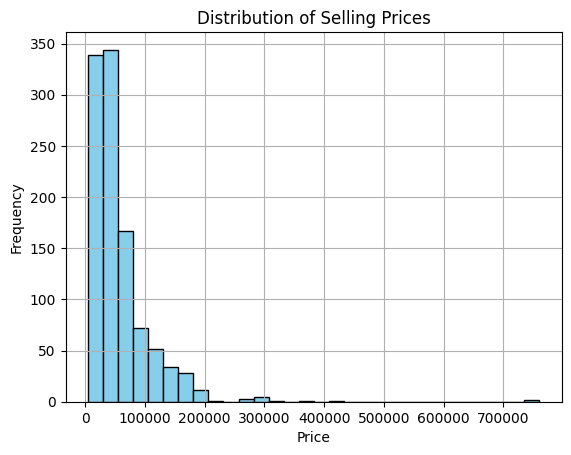

In [30]:
#Q3: Plot the distribution of selling prices using a histogram and describe the trend.

#Answer:

import matplotlib.pyplot as plt

df['selling_price'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Selling Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()
#Observation: Most bikes are in the lower to mid-price range, with fewer in the high-price range.

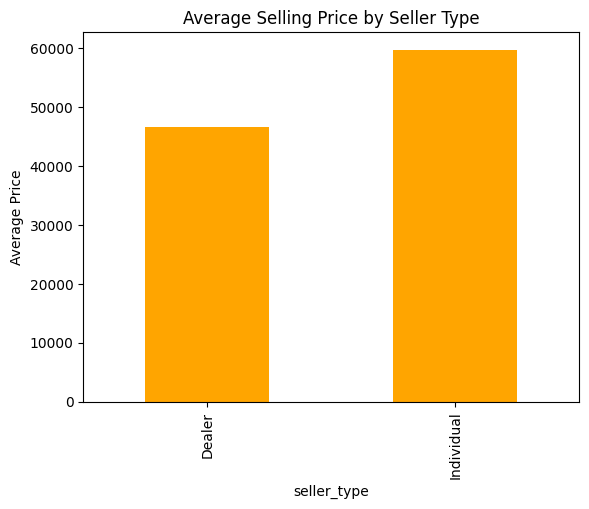

In [ ]:
#Q4: Create a bar plot to visualize average selling price for each seller_type and write one observation.

#Answer:

avg_price = df.groupby("seller_type")['selling_price'].mean()
avg_price.plot(kind='bar', color='orange')
plt.title("Average Selling Price by Seller Type")
plt.ylabel("Average Price")
plt.show()


#Observation: Dealers tend to sell bikes at higher average prices than individuals.

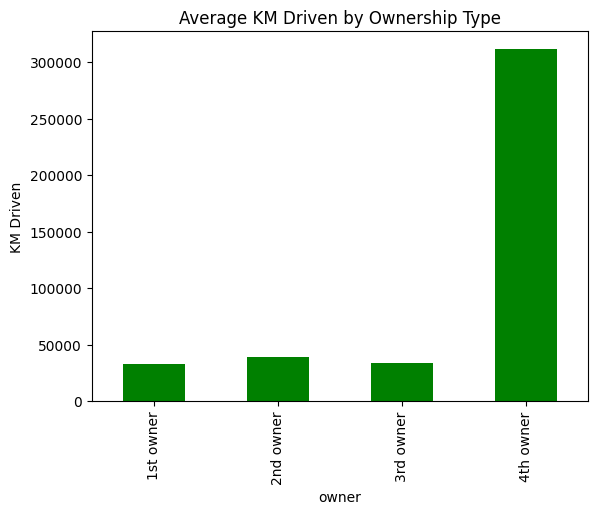

In [ ]:
#Q5: Compute the average km_driven for each ownership type and present the result as a bar plot.

#Answer:

avg_km = df.groupby("owner")['km_driven'].mean()
avg_km.plot(kind='bar', color='green')
plt.title("Average KM Driven by Ownership Type")
plt.ylabel("KM Driven")
plt.show()


#Observation: Bikes with multiple previous owners usually have higher km driven.

In [ ]:
#Q6: Use the IQR method to detect and remove outliers from km_driven. Show before-and-after summary.

#Answer:

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print("Before:", df['km_driven'].describe())
df = df[(df['km_driven'] >= lower) & (df['km_driven'] <= upper)]
print("After:", df['km_driven'].describe())


#Observation: Extreme high values were removed → dataset becomes more consistent.

Before: count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64
After: count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


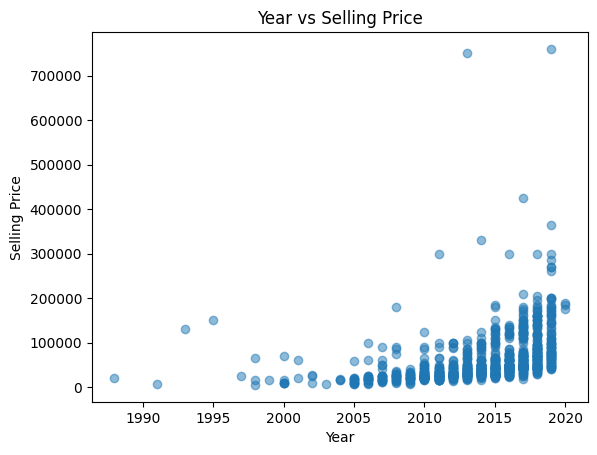

In [ ]:
#Q7: Create a scatter plot of year vs selling_price.

#Answer:

plt.scatter(df['year'], df['selling_price'], alpha=0.5)
plt.title("Year vs Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()


#Observation: Newer bikes generally have higher resale value, older bikes sell for less.

In [ ]:
#Q8: Convert seller_type column into numeric format using one-hot encoding.

#Answer:

df_encoded = pd.get_dummies(df, columns=['seller_type'])
print(df_encoded.head())

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350       87958.714058               False                    True  
1       5650       87958.714058               False                    True  
2      12000      148114.000000               False                    True  
3      23000       89643.000000               False                    True  
4      21000       87958.714058               False                    True  


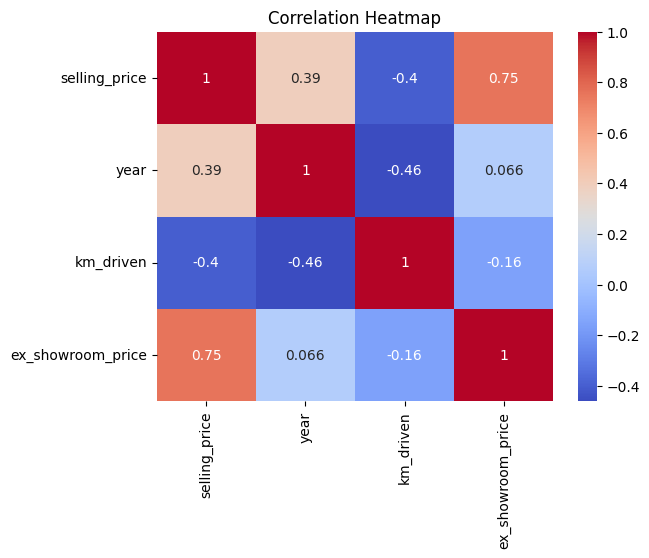

In [ ]:
#Q9: Generate a heatmap of the correlation matrix for numeric columns. What correlations stand out?

#Answer:

import seaborn as sns

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


#Observation:

#Selling price has strong correlation with year (newer = higher price).

#Weak correlation with km_driven (more driven = slightly lower price).

Q10: Summarize findings in a brief report.

Answer:

Factors affecting price: Year (new bikes = higher price), seller type (dealer > individual), km_driven (more km = lower price).

Data cleaning: Handled missing values, removed km_driven outliers using IQR.

Feature engineering: One-hot encoding for seller_type, scaling numerical features if needed.

Conclusion: Resale price mainly depends on bike age and ownership history.